In [2]:
import numpy as np

In [3]:
def get_subWordSet(input_string):
    length = len(input_string)
    return set([input_string[i: j + 1] for i in range(length) for j in range(i, length)])


def get_weightedJac(R1, R2, 
                    get_weight=None, *, 
                    symbol_weight_map=None, 
                    verbose=False):
    """
    Calculate the (weighted) Jaccard distance between two formatted medical histories.
    """
    if get_weight is None:
        get_weight = lambda seq: 1
    
    if get_weight == 'linear':
        get_weight = lambda seq: np.array([symbol_weight_map[s] for s in seq]).sum()
    
    S1 = get_subWordSet(R1)
    S2 = get_subWordSet(R2)
    union = S1.union(S2)
    intersection = S1.intersection(S2)
    
    if verbose:
        print('S1: {}'.format(S1))
        print('S2: {}'.format(S2))
        print('Union: {}'.format(union))
        print('Intersection: {}'.format(intersection))
    
    weight_union = 0
    weight_intersection = 0
    for seq in union:
        weight = get_weight(seq)
        weight_union += weight
        if seq in intersection:
            weight_intersection += weight
    
    return 1.0 - float(weight_intersection) / float(weight_union)

In [17]:
def get_all_weightedJac(R1, R2, 
                        get_weight=None, *,
                        end_time=None,
                        symbol_weight_map=None):
    """
    Calculate the (weighted) trancated Jaccard distance between two formatted medical histories.
    """
    if get_weight is None:
        get_weight = lambda seq: 1
    
    if get_weight == 'linear':
        get_weight = lambda seq: np.array([symbol_weight_map[s] for s in seq]).sum()
    
    if end_time == None:
        end_time = min(len(R1), len(R2))
        
    union = {}
    weight_union = 0
    weight_intersection = 0
    distances = []
    
    for time in range(1, end_time):
        
        for t in range(1, time):
            word1 = R1[time - t: time]
            word2 = R2[time - t: time]
            
            if word1 in union:
                if union[word1][0] == '2':
                    weight = union[word1][1]
                    weight_union -= weight
                    weight_intersection += weight
                    union.pop(word1)
            else:
                union[word1] = ['1', get_weight(word1)]
                
            if word2 in union:
                if union[word2][0] == '1':
                    weight = union[word2][1]
                    weight_union -= weight
                    weight_intersection += weight
                    union.pop(word2)
            else:
                union[word2] = ['2', get_weight(word2)]
            
            
        distance = 1.0 - float(weight_intersection) / float(weight_union)
        distances.append(distance)
        
    return np.array(distances)

In [18]:
symbol_weight_map = {'1': 1, '2': 2}
R1 = '1222111212221'
R2 = '12121222111121'
get_all_weightedJac(R1, R2, get_weight='linear', symbol_weight_map=symbol_weight_map)

ZeroDivisionError: float division by zero

In [ ]:
def get_epsilon_neighborhood(dist, epsilon, histories, time):
    """
    """
    for i in range(num_histories):
        indices = np.arange(num_histories)[dist[i] <= epsilon]
        histogram = {i: 0 for i in range(num_diseases)}

        for idx in indices:
            histogram[int(histories[idx][time])] += 1
        print('{}:\t{}'.format(i, histogram))


def foo(histories, end_time, prevalence):
    for 

# Generate dummy history

In [8]:
length = 50 # Let us assume that histories are of uniform length
num_histories = 100
num_diseases = 10
prevalence = np.array([50, 1, .5, .5, .5, .2, .2, .1, .1, 0.05])
prevalence = prevalence / prevalence.sum()

## The no-brainer way
with which I probably will give a man breast cancer or so... (or a woman prostate cancer, which is even less likely)

**Please help me come up more sensable ways of generating dummy medical histories.**

In [12]:
matrix = np.random.choice(10, size=(num_histories, length), replace=True, p=prevalence)
histories = []
for idx, row in enumerate(matrix):
    history = ''.join(list(map(str, row)))
    # print('{}:\t{}'.format(idx, history))
    histories.append(history)

In [11]:
Jaccard = np.zeros((num_histories, num_histories))
for i in range(num_histories):
    for j in range(i + 1, num_histories):
        jac = get_weightedJac(histories[i], histories[j])
        # print('{}, {}:\t{}'.format(i, j, jac))
        Jaccard[i][j] = jac
        Jaccard[j][i] = jac

# Cluster and plot

In [38]:
from sklearn.cluster import KMeans, spectral_clustering

In [ ]:
beta = 1.
sim = np.exp(-beta * Jaccard / Jaccard.std())
labels = spectral_clustering(sim, n_clusters=10, eigen_solver='arpack')
sortedIdx = np.argsort(labels)
Jsorted=Jaccard[sortedIdx][:,sortedIdx]

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

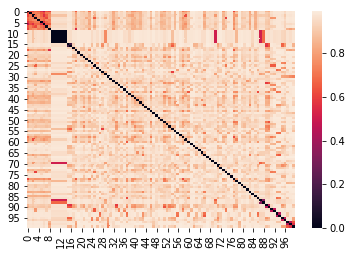

In [40]:
sns.heatmap(Jsorted)
plt.show()

In [7]:
epsilon = .98
time = 5
get_epsilon_neighborhood(Jaccard, epsilon, histories, time)